In [10]:
#simple Linear Regression to predict quality_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("GRAPE_QUALITY.csv")

# Drop unnecessary columns
data = data.drop(columns=['sample_id', 'harvest_date'])

# Define features and target
X = data.drop(columns=['quality_score'])  # Features
y = data['quality_score']  # Target variable

# Split the data into train/validation/test sets (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

# Identify categorical and numerical columns
cat_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

# Define the preprocessing pipeline for categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns),
        ('num', numerical_transformer, num_columns)
    ]
)

# Define the full pipeline with Linear Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Example of predictions
predictions = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
print("\nSample Predictions:")
print(predictions)


Categorical Columns:  ['variety', 'region', 'quality_category']
Numerical Columns:  ['sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']
Mean Squared Error (MSE): 0.0046285940446853645
R² Score: 0.983152084808664

Sample Predictions:
   Actual  Predicted
0    2.78   2.755127
1    1.92   1.998535
2    2.25   2.262207
3    2.88   2.875732
4    3.01   3.038330


In [11]:
#simple Linear classification to predict quality_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("GRAPE_QUALITY.csv")

# Drop unnecessary columns
data = data.drop(columns=['sample_id', 'harvest_date'])

# Define features and target
X = data.drop(columns=['quality_category'])  # Features
y = data['quality_category']  # Target variable

# Split the data into train/validation/test sets (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

# Identify categorical and numerical columns
cat_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

# Define the preprocessing pipeline for categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns),
        ('num', numerical_transformer, num_columns)
    ]
)

# Define the full pipeline with Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=25))
])

# Train the model on the training set
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Example of predictions
predictions = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
print("\nSample Predictions:")
print(predictions)


Categorical Columns:  ['variety', 'region']
Numerical Columns:  ['quality_score', 'sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']
Accuracy: 0.94

Confusion Matrix:
[[91  0  3  0]
 [ 0  3  0  0]
 [ 2  1 93  0]
 [ 7  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.97      0.94        94
         Low       0.75      1.00      0.86         3
      Medium       0.97      0.97      0.97        96
     Premium       0.00      0.00      0.00         7

    accuracy                           0.94       200
   macro avg       0.66      0.73      0.69       200
weighted avg       0.90      0.94      0.92       200


Sample Predictions:
   Actual Predicted
0    High      High
1  Medium    Medium
2  Medium    Medium
3    High      High
4    High      High


C:\Users\vijeykumar.selvaraj\AppData\Local\anaconda3\envs\pycaret-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vijeykumar.selvaraj\AppData\Local\anaconda3\envs\pycaret-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vijeykumar.selvaraj\AppData\Local\anaconda3\envs\pycaret-env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("GRAPE_QUALITY.csv")

# Drop unnecessary columns
data = data.drop(columns=['sample_id', 'harvest_date'])

# Define features and target
X = data.drop(columns=['quality_score'])  # Features
y = data['quality_score']  # Target variable

# Split the data into train/validation/test sets (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

# Identify categorical and numerical columns
cat_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

# Define the preprocessing pipeline for categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_columns),
        ('num', numerical_transformer, num_columns)
    ]
)

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=25))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best model and parameters
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred = best_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

# Example of predictions
predictions = pd.DataFrame({'Actual': y_test[:5].values, 'Predicted': y_pred[:5]})
print("\nSample Predictions:")
print(predictions)


Categorical Columns:  ['variety', 'region', 'quality_category']
Numerical Columns:  ['sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

Evaluation Metrics:
Mean Squared Error (MSE): 0.010779623837499999
R² Score: 0.96076255846692

Sample Predictions:
   Actual  Predicted
0    2.78    2.80715
1    1.92    2.05090
2    2.25    2.24350
3    2.88    2.79715
4    3.01    3.09570


In [13]:
#Build a custom Gradient boosting model to predict both quality_score and quality_category along with hyperparameter tuning

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import joblib

# Load data
data = pd.read_csv("GRAPE_QUALITY.csv")
new_data = data.drop(columns=['sample_id', 'harvest_date'])

# Split features and target variables
X = new_data.drop(columns=['quality_category', 'quality_score'])
y_category = new_data['quality_category']
y_score = new_data['quality_score']

# Split data into train/validation/test sets (60/20/20)
X_train, X_temp, y_category_train, y_category_temp, y_score_train, y_score_temp = train_test_split(
    X, y_category, y_score, test_size=0.4, random_state=25
)
X_val, X_test, y_category_val, y_category_test, y_score_val, y_score_test = train_test_split(
    X_temp, y_category_temp, y_score_temp, test_size=0.5, random_state=25
)

# Identify categorical and numerical columns
cat_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
num_columns = [col for col in X_train.columns if X_train[col].dtype in ['int', 'float']]

# Preprocessing pipelines
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', categorical_transformer, cat_columns),
    ('num', numerical_transformer, num_columns)
])

# Define parameter grids
classification_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7]
}

regression_params = {
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__min_samples_split': [2, 5, 10]
}

# Classifier pipeline and hyperparameter tuning
classifier_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=25))
])

grid_search_classifier = GridSearchCV(
    estimator=classifier_pipeline,
    param_grid=classification_params,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_classifier.fit(X_train, y_category_train)
best_classifier = grid_search_classifier.best_estimator_
print("Best Classifier Parameters:", grid_search_classifier.best_params_)

# Regressor pipeline and hyperparameter tuning
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=25))
])

grid_search_regressor = GridSearchCV(
    estimator=regression_pipeline,
    param_grid=regression_params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_regressor.fit(X_train, y_score_train)
best_regressor = grid_search_regressor.best_estimator_
print("Best Regressor Parameters:", grid_search_regressor.best_params_)

# Combined model
class CombinedGradientBoosting:
    def __init__(self, classification_model, regression_model):
        self.classification = classification_model
        self.regression = regression_model

    def fit(self, X, y):
        self.classification.fit(X, y['quality_category'])
        self.regression.fit(X, y['quality_score'])
        return self

    def predict(self, X):
        classification_preds = self.classification.predict(X)
        regression_preds = self.regression.predict(X)
        return pd.DataFrame({
            'quality_category': classification_preds,
            'quality_score': regression_preds
        }, index=X.index)

# Multi-output model combining both
optimized_model = CombinedGradientBoosting(
    classification_model=best_classifier,
    regression_model=best_regressor
)

# Fit the combined model
optimized_model.fit(X_train, pd.concat([y_category_train, y_score_train], axis=1))

# Save the pipeline
joblib.dump(optimized_model, 'optimized_combined_model.pkl')
print("Optimized model saved successfully!")



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Classifier Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Regressor Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_split': 10, 'model__n_estimators': 150}
Optimized model saved successfully!


In [14]:
#use the model to predict on the test_data
import pandas as pd
import joblib

# Load the saved model
optimized_model = joblib.load('optimized_combined_model.pkl')

# Prepare the test data
# Ensure the test data (X_test) is preprocessed in the same way as during training
# If X_test is already available, skip this step
# If needed, ensure `cat_columns` and `num_columns` are set up as in training

# Predict on the test data
predictions = optimized_model.predict(X_test)

# Combine predictions into a DataFrame
results = pd.DataFrame({
    'quality_category_actual': y_category_test,
    'quality_category_predicted': predictions['quality_category'],
    'quality_score_actual': y_score_test,
    'quality_score_predicted': predictions['quality_score']
})

# Display the first few rows of results
print("Prediction Results:")
print(results.head())

# Save the results to a CSV file (optional)
results.to_csv('prediction_results.csv', index=False)
print("Prediction results saved to prediction_results.csv.")


Prediction Results:
    quality_category_actual quality_category_predicted  quality_score_actual  \
189                    High                       High                  2.78   
381                  Medium                     Medium                  1.92   
644                  Medium                     Medium                  2.25   
572                    High                       High                  2.88   
986                    High                       High                  3.01   

     quality_score_predicted  
189                 2.788752  
381                 1.922516  
644                 2.293372  
572                 2.841576  
986                 3.041023  
Prediction results saved to prediction_results.csv.


In [15]:
#Scoring the store pipeline and model

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    mean_squared_error, mean_absolute_error, r2_score
)
import numpy as np

# Classification Metrics
y_category_pred = predictions['quality_category']
accuracy = accuracy_score(y_category_test, y_category_pred)
precision = precision_score(y_category_test, y_category_pred, average='weighted')
recall = recall_score(y_category_test, y_category_pred, average='weighted')
f1 = f1_score(y_category_test, y_category_pred, average='weighted')
conf_matrix = confusion_matrix(y_category_test, y_category_pred)

print("Classification Metrics (Quality Category):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Regression Metrics
y_score_pred = predictions['quality_score']
mse = mean_squared_error(y_score_test, y_score_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_score_test, y_score_pred)
r2 = r2_score(y_score_test, y_score_pred)

print("\nRegression Metrics (Quality Score):")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Classification Metrics (Quality Category):
Accuracy: 0.915
Precision: 0.922860824742268
Recall: 0.915
F1-Score: 0.9136683937823834
Confusion Matrix:
 [[87  0  7  0]
 [ 0  3  0  0]
 [ 3  3 90  0]
 [ 4  0  0  3]]

Regression Metrics (Quality Score):
Mean Squared Error (MSE): 0.00317313041577701
Root Mean Squared Error (RMSE): 0.056330546027683864
Mean Absolute Error (MAE): 0.04585242367754855
R² Score: 0.9884499198633666


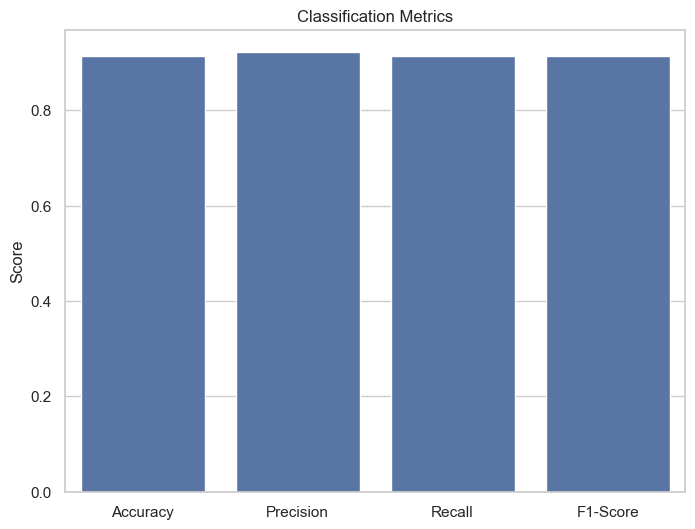

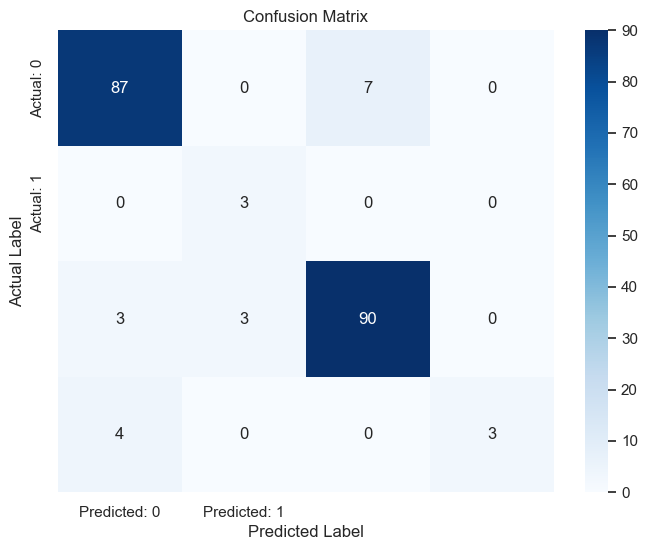

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.metrics import confusion_matrix

# Classification Metrics
classification_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1    
    }

# Create a seaborn bar plot for the classification metrics
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=list(classification_metrics.keys()), y=list(classification_metrics.values()))
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.show()



# Confusion Matrix
conf_matrix = confusion_matrix(y_category_test, y_category_pred)

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted: 0', 'Predicted: 1'], yticklabels=['Actual: 0', 'Actual: 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


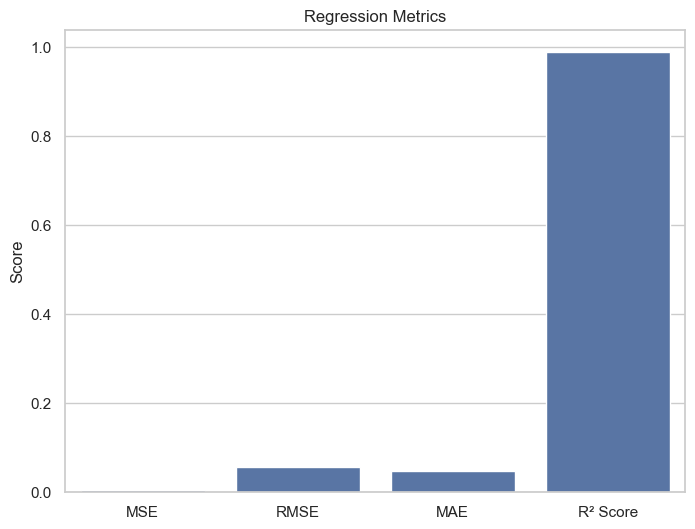

In [18]:
# Regression Metrics
regression_metrics = {
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae,
    'R² Score': r2
}

# Create a seaborn bar plot for the regression metrics
plt.figure(figsize=(8, 6))
sns.barplot(x=list(regression_metrics.keys()), y=list(regression_metrics.values()))
plt.title('Regression Metrics')
plt.ylabel('Score')
plt.show()
